In [1]:
import rebound
import sys
#change the next line to reflect where you have downloaded the source code
sys.path.insert(0, '/Users/kvolk/Documents/GitHub/SBDynT/src')
import sbdynt as sbd

**Example of some built-in plotting scripts available**

In [2]:
#Set up and run a simulation with clones of a chaotic TNO for this example
sim= rebound.Simulation()
sbody = 'K00F53X'
savefile = "K00F53X-archive.bin"
nclones = 10
tmax = 5e6
tout = 1e3

In [3]:
iflag, epoch, sim = sbd.initialize_simulation(planets=['Jupiter','Saturn','Uranus','Neptune'],
                                                 des=sbody, clones=nclones)
if(iflag):
    rflag, sim = sbd.run_simulation(sim, tmax=tmax, tout=tout,filename=savefile,deletefile=True)

In [4]:
#now reading all the clones (the best fit will be indexed 0, then clones)
(flag, a, e, inc, node, aperi, ma, phi, t,res_str) = sbd.read_sa_for_resonance(
                            sbody=sbody,
                            archivefile=savefile,planet='neptune',
                            p=7,q=4,nclones=nclones)

/Users/kvolk/opt/anaconda3/envs/sbdynt/lib/python3.9/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


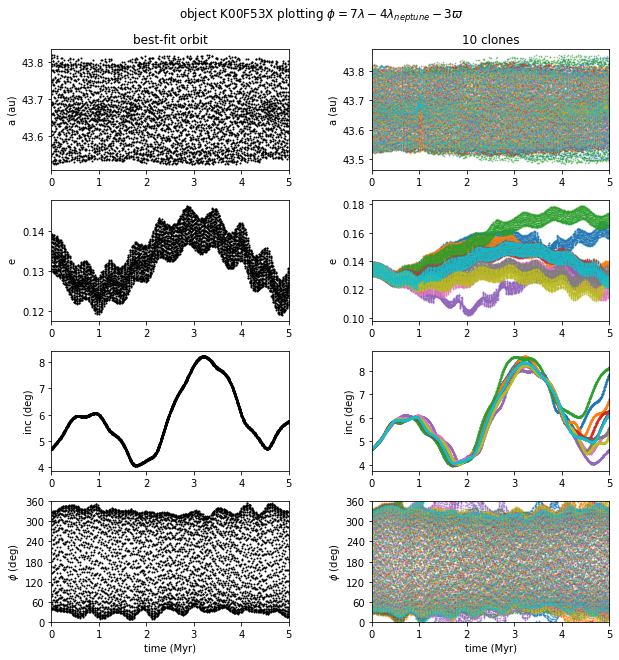

In [5]:
#default plotting function call
flag, fig1 = sbd.plot_resonance(sbody=sbody,
                          res_string=res_str,
                          a=a,e=e,inc=inc,phi=phi,t=t,
                          nclones=nclones,figfile=None)

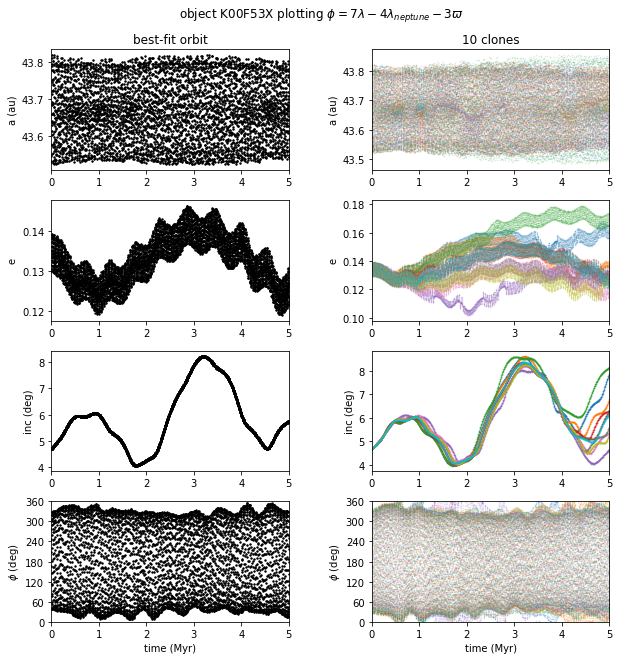

In [6]:
#Advanced options on that plotting call:
#you can make the point sizes bigger or smaller and the clones more or less transparent
#bfps controls the best-fit
#cps controls the clones
#calpha controls the clone transparency
flag, fig2 = sbd.plot_resonance(sbody=sbody,
                          res_string=res_str,
                          a=a,e=e,inc=inc,phi=phi,t=t,
                          nclones=nclones,figfile=None,bfps=2.,cps=0.2,calpha=0.2)

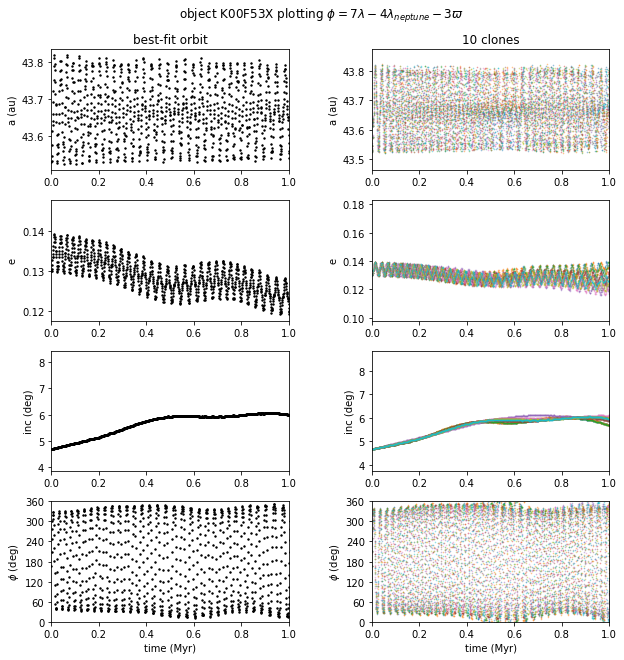

In [7]:
#More options:
#set the x-axis range:
tmin=0.
tmax=1e6
flag, fig3 = sbd.plot_resonance(sbody=sbody,
                          res_string=res_str,
                          a=a,e=e,inc=inc,phi=phi,t=t,
                          nclones=nclones,figfile=None,bfps=2.,cps=0.4,calpha=0.4,
                          tmin=tmin,tmax=tmax)

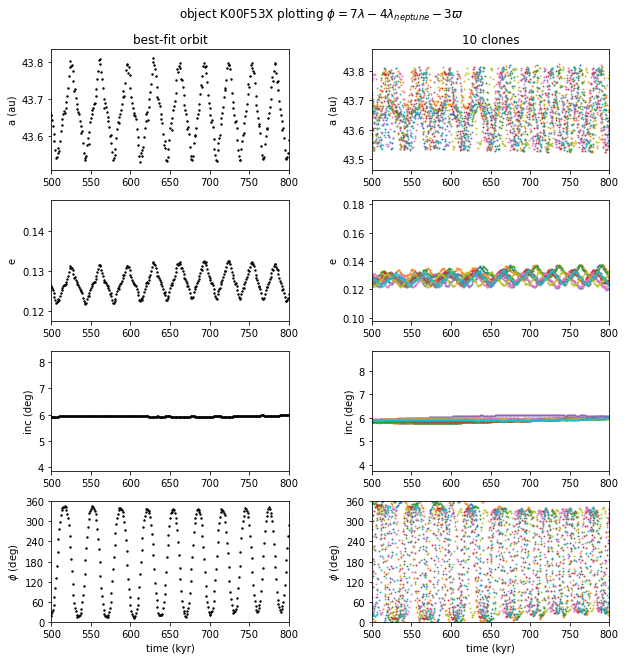

In [8]:
#zoom in even further where the clones start diverging
tmin=0.5e6
tmax=0.8e6
flag, fig4 = sbd.plot_resonance(sbody=sbody,
                          res_string=res_str,
                          a=a,e=e,inc=inc,phi=phi,t=t,
                          nclones=nclones,figfile=None,bfps=2.,cps=1,calpha=0.9,
                          tmin=tmin,tmax=tmax)

In [2]:
#Maybe you want to look at an object in a rotating frame with the planet it is resonant with
#Let's take a look at that for a simple 3:2 resonant object:

sim= rebound.Simulation()
sbody = 'K14X40T'
savefile = "K14X40T-short-archive.bin"
nclones = 5
tmax = 0.25e6
tmin=0.
tout = 1e2
flag, epoch, sim = sbd.initialize_simulation(planets=['Jupiter','Saturn','Uranus','Neptune'],
                                                 des=sbody, clones=nclones)
flag, sim = sbd.run_simulation(sim, tmax=tmax, tout=tout,filename=savefile,deletefile=True)

/Users/kvolk/opt/anaconda3/envs/sbdynt/lib/python3.9/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/Users/kvolk/opt/anaconda3/envs/sbdynt/lib/python3.9/site-packages/rebound/simulation.py:148: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


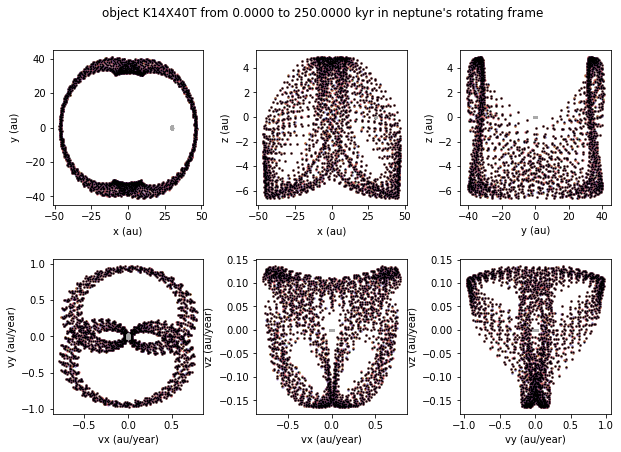

In [3]:
#you can calculate the coordinates in the rotating frame and make the plot all in one command

flag,fig5 = sbd.calc_and_plot_rotating_frame(sbody=sbody,planet = 'neptune',
                                        archivefile=savefile,
                          nclones=nclones,figfile='rotating-frame-example.png',
                          tmin=tmin,tmax=tmax,cps=2,bfps=0.5)

In [4]:
#or you can calculate the positions and velocities then plot on your own
flag, xr, yr, zr, vxr, vyr, vzr, t = sbd.calc_rotating_frame(sbody='neptune', archivefile=savefile,
                                                             planet='neptune',
                                                            nclones=0)

flag, pxr, pyr, pzr, pvxr, pvyr, pvzr, t = sbd.calc_rotating_frame(sbody=sbody, archivefile=savefile,
                                                             planet='neptune',
                                                            nclones=0)

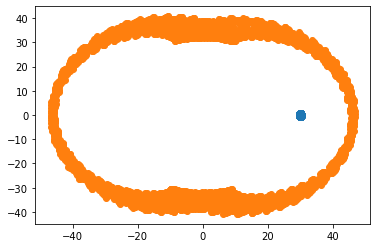

In [5]:
import matplotlib.pyplot as plt
plt.scatter(xr,yr)
plt.scatter(pxr,pyr)